# Visualize Bounding Box and Creating Text File For Model

In [5]:
#!python -c 'import keras 2.0.3; print(keras.__version__)'
pip install keras==2.1.6

     |████████████████████████████████| 348kB 2.8MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


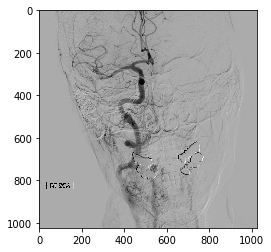

In [11]:
image = plt.imread('/content/gdrive/My Drive/CS168/data/train/pre_frontal/381_Pre_Frontal.png')
plt.imshow(image, cmap="gray")

In [8]:
train = pd.read_csv('gdrive/My Drive/CS168/EvanAttempt/keras-frcnn/train.csv')
train.head()

FileNotFoundError: ignored

In [0]:
train['image_names'].nunique()

129

In [0]:
train['type'].value_counts()

frontal    66
lateral    63
Name: type, dtype: int64

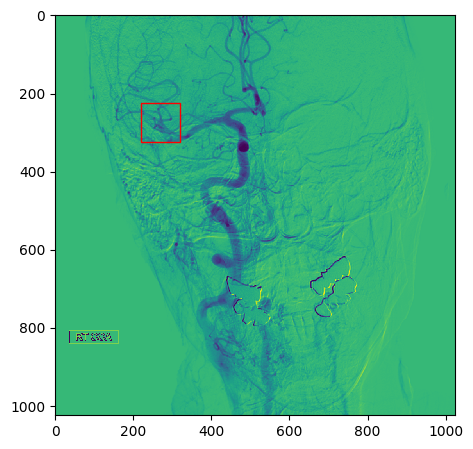

In [0]:
fig = plt.figure(dpi=100)

#add axes to the image
ax = fig.add_axes([0,0,1,1])

image = plt.imread('gdrive/My Drive/CS168/data/train/pre_frontal/381_Pre_Frontal.png')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "381_Pre_Frontal.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.type == 'Pre_Frontal':
        edgecolor = 'r'
        ax.annotate('Occlusion', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'red', facecolor = 'none')
    
    ax.add_patch(rect)
plt.show()

In [0]:
data = pd.DataFrame()
data['format'] = train['image_names']

for i in range(data.shape[0]):
    data['format'][i] = './train_images/' + data['format'][i]
    
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [0]:
filename ='/content/gdrive/My Drive/CS168/data/train/pre_lateral/349_Pre_Lateral.png'
img = cv2.imread(filename)
(rows,cols) = img.shape[:2]


# Training Model

In [0]:
%cd /content/gdrive/My\ Drive/CS168/EvanAttempt/keras-frcnn

!python train_frcnn.py -o simple -p annotate.txt

/content/gdrive/My Drive/CS168/EvanAttempt/keras-frcnn
Using TensorFlow backend.
Parsing annotation files
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/330_Pre_Frontal.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/330_Pre_Lateral.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/328_Pre_Frontal.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/328_Pre_Lateral.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/327_Pre_Frontal.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/327_Pre_Lateral.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/326_Pre_Frontal.png
/content/gdrive/My Drive/CS168/Faster_RCNN_for_Open_Images_Dataset_Keras-master/train_images/326_Pre_La

In [9]:
%cd /content/gdrive/My\ Drive/CS168/EvanAttempt/keras-frcnn

!python test_frcnn.py -p test_images

/content/gdrive/My Drive/CS168/EvanAttempt/keras-frcnn
Using TensorFlow backend.
{0: 'occlusion', 1: 'bg'}
Instructions for updating:
Colocations handled automatically by placer.
Loading weights from ./model_frcnn.hdf5
2019-06-06 18:23:14.171877: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-06 18:23:14.172201: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x79b9340 executing computations on platform Host. Devices:
2019-06-06 18:23:14.172235: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-06-06 18:23:14.331058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-06-06 18:23:14.331528: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x79b9600 executing computations on platform CUDA. Devices:
2019-06-06 18: